<font size=7 face="courier">Electrophysiology Source Code


    
**To Do**
* <font color="green">Make rasterplot</font>
* <font color="red"><s>(Optional) show variability in number of active units in the population over time<font color="red">
* <font color="green">Plot average firing rate distribution over all units</font>
* <font color="green">Plot ISI distribution for 2-3 example units (to show differences in distribution shape)</font>
* <font color="orange">(optionally) compute CV score for distribution to quantify difference</font>
* <font color="green">Plot spike time latency distribution for pair of units (choose example with narrow distribution with nonzero mean). Ask what this distribution means for the interaction between the two units.</font>
* <font color="green">Compute correlation matrix and plot results as distribution</font>
* <font color="green">Compute STTC matrix and plot results as distribution</font>

**Exercises**
* Data Exploration: shape, number of spikes accros a all channels, get firing rate
* Only give figures for some, force them to then plot
* pick neuron, how was firing rate before and after (check braingeneerspy code)
* Diazapam is shorter burst window, smaller interburst interval, diazapam has 3 peaks
* adjust xmlin to analyze the datas
    * "these are what we should see" display a graph that shows it
* calculate firing rate
* Have students calculate CV score for every unit

# Set Up Data

import stuff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import braingeneers
from braingeneers.analysis.analysis import SpikeData
import scipy.io as sio
import scipy
from scipy.ndimage import gaussian_filter1d
#!pip install powerlaw

<font color="blue">mat_to_spikeData</font> is a helper function for loading the data into braingeneerspy's prefered class for analyzing ephys data.

In [3]:
def mat_to_spikeData(mat_path):
    mat = sio.loadmat(mat_path)
    units = [i[0][0]*1e3 for i in mat['spike_times']]
    sd = SpikeData(units)
    return sd

Load in the control dataset from Tal's experiment on a cerbral organoid.

In [4]:
data_control = mat_to_spikeData('data/Spike_Raster_Control.mat')

# Make Raster Plot

What is shape of matrix?

Both recordings are 3 minutes long

In [48]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()

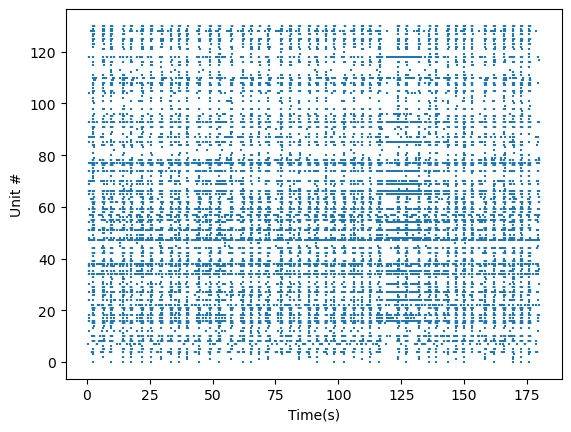

In [72]:
plot_raster(data_control)

# Plot Average Firing Rate over All Units

Count number of spikes

Calculate average firing rate

How much acivity is there in a burst

In [38]:
def raster_analysis(sd):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,20)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.show()

In [6]:
sd = data_control

In [7]:
idces, times = sd.idces_times()

In [7]:
#raster_analysis(data_control)

In [9]:
times

array([   686.75,    808.  ,    808.05, ..., 179879.6 , 179879.65,
       179879.7 ])

# Calculate firing rate

## Method 1

In [42]:
data_control = mat_to_spikeData('data/Spike_Raster_Control.mat')

In [44]:
idces, times = data_control.idces_times()

In [45]:
idces

array([  7, 118,  48, ...,  62,  30, 117])

In [54]:
rates=data_control.rates(unit='Hz')

In [60]:
np.mean( rates )

1.3476351902991721

(array([37., 17.,  8., 10.,  6.,  3.,  3.,  2.,  2.,  3.,  7.,  4.,  1.,
         2.,  1.,  2.,  1.,  2.,  1.,  0.,  2.,  1.,  1.,  1.,  1.,  1.,
         0.,  2.,  0.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([5.55927100e-03, 1.66666945e-01, 3.27774618e-01, 4.88882292e-01,
        6.49989966e-01, 8.11097639e-01, 9.72205313e-01, 1.13331299e+00,
        1.29442066e+00, 1.45552833e+00, 1.61663601e+00, 1.77774368e+00,
        1.93885135e+00, 2.09995903e+00, 2.26106670e+00, 2.42217438e+00,
        2.58328205e+00, 2.74438972e+00, 2.90549740e+00, 3.06660507e+00,
        3.22771274e+00, 3.38882042e+00, 3.54992809e+00, 3.71103576e+00,
        3.87214344e+00, 4.03325111e+00, 4.19435879e+00, 4.35546646e+00,
        4.51657413e+00, 4.67768181e+00, 4.83878948e+00, 4.99989715e+00,
        5.16100483e+00, 5.32211250e+00, 5.48322017e+00, 5.64432785e+00,
        5.80543552e+00, 5.96654320e+00, 6.12765087e+00, 6.28875854e+

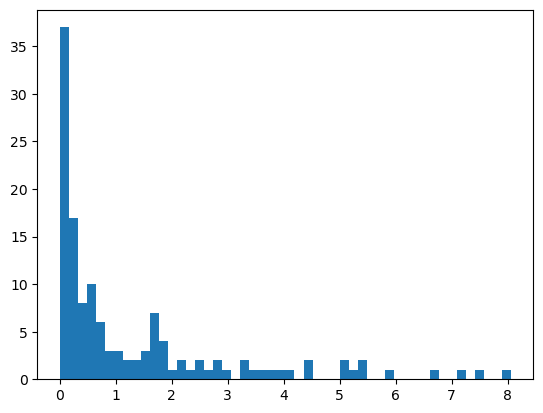

In [55]:
n_bins = 50

#plt.xlim(0,100)
plt.hist(rates, bins=n_bins)
#plt.hist(isis[0],bins=n_bins)
#plt.hist(isis[2],bins=n_bins)
#plt.xlabel('Time bin(ms)')
#plt.ylabel('ISI count')


## method 2

In [65]:
spike_tot = 0
for train in  data_control.train:
    spike_tot += len(train)

In [73]:
spike_tot/131/175

1.3852126499454744

In [71]:
len(data_control.train)

131

In [75]:
spike_tot/131/data_control.length * 1e3

1.3476351902991721

In [1]:
sd.length

NameError: name 'sd' is not defined

In [70]:
data_control.length

179879.7

In [68]:
import scipy.io
mat = scipy.io.loadmat('data/Spike_Raster_Control.mat')

# Interspike-intervals of 2 select neurons

to make htis look good, remove all hte isi's that are over 100, then plot histogram.

ISI is higher for diazapam

In [28]:
# Interspike-intervals of 2 select neurons
isis = data_control.interspike_intervals()

In [29]:
isis2=[]
for i in range(len(isis)):
    isi=isis[i]
    isis2 = isis2 + isi[isi<100].tolist() 

Text(0, 0.5, 'ISI count')

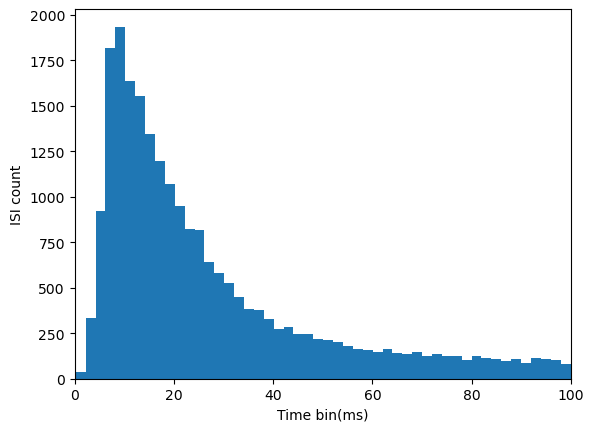

In [34]:

# print(isis[0])
# Plot the first
n_bins = 50

plt.xlim(0,100)
plt.hist(isis2, bins=n_bins)
#plt.hist(isis[0],bins=n_bins)
#plt.hist(isis[2],bins=n_bins)
plt.xlabel('Time bin(ms)')
plt.ylabel('ISI count')


In [36]:
np.std(isis2)/np.mean(isis2)

0.8288942461758334

# <font color="red">CV Score

This is $sd/mean$

if 1 means poission, less than one means less random, 

In [ ]:
isis

The lesson, diazapam makes it less random

replicatte figure in paper, cor CV score, hint use unit 63, get isi's less than 100

histogram of cv scores

# Compute Correlation Matrix

In [76]:
def correlation(sd):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    # Blur it
    sigma = 5
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 

    # Correlation at 0 lag
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            corr[i,j] = scipy.signal.correlate(dense_raster[i],dense_raster[j],'valid')

    plt.imshow(corr)
    plt.xlabel("Neuron ind")
    plt.ylabel("Neuron ind")
    plt.show() 
        

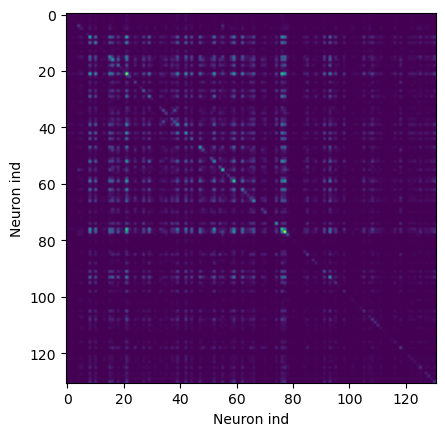

In [77]:
correlation(data_control)